# NLTK Intro

**Natural Language Toolkit (NLTK)** is one of the most famous and leading platforms for building Python-based NLP applications. Other popular NLP libraries in Python are **spaCy**, **Gensim**, and **TextBlob**.

In [2]:
#conda install nltk

In [2]:
import nltk

NLTK comes with over 100 collections of large and well-structured text datasets, which are called corpora in NLP. Corpora can be used as dictionaries for checking word occurrences and as training pools for model learning and validating. Some useful and interesting corpora include Web Text corpus, Twitter samples, Shakespeare corpus, Sentiment Polarity, Names corpus, WordNet, and the Reuters benchmark corpus. The full list can be found at http://www.nltk.org/nltk_data. 

Before using any of these corpus resources, we need to first download them by running the following code in the Python interpreter:

In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# Bag of Words (BoW)

If we are only interested in the occurrence of certain words, their count, or a related measure, and not in the order of the words, we can view a text as a collection of words. This is called the **Bag of Words (BoW)** model. This is a very basic model, but it works pretty well in practice.

# Stemming and lemmatization

We have two basic strategies to deal with words from the
same root: stemming and lemmatization. Stemming is a quicker approach that involves, if necessary, chopping off letters; for example, 'words' becomes 'word' after stemming. The result of stemming doesn't have to be a valid word. For instance, 'trying' and 'try' become 'tri'. Lemmatizing, on the other hand, is slower but more accurate. It performs a dictionary lookup and guarantees to return a valid word. 

# NLTK usage examples

In [4]:
from nltk.corpus import names

In [5]:
print(names.words()[:10])

['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi', 'Abbie', 'Abby', 'Abigael', 'Abigail', 'Abigale']


In [6]:
print(len(names.words()))

7944


In [7]:
from nltk.tokenize import word_tokenize
sentence = 'I have been to U.K. and U.S.A.'
print(word_tokenize(sentence))

['I', 'have', 'been', 'to', 'U.K.', 'and', 'U.S.A', '.']


In [8]:
tokens = word_tokenize(sentence)
print(nltk.pos_tag(tokens))

[('I', 'PRP'), ('have', 'VBP'), ('been', 'VBN'), ('to', 'TO'), ('U.K.', 'NNP'), ('and', 'CC'), ('U.S.A', 'NNP'), ('.', '.')]


In [10]:
nltk.help.upenn_tagset('PRP')

PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us


In [11]:
nltk.help.upenn_tagset('VBP')

VBP: verb, present tense, not 3rd person singular
    predominate wrap resort sue twist spill cure lengthen brush terminate
    appear tend stray glisten obtain comprise detest tease attract
    emphasize mold postpone sever return wag ...


In [12]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
print(porter_stemmer.stem('machines'))
print(porter_stemmer.stem('learning'))

machin
learn


In [13]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('machines'))
print(lemmatizer.lemmatize('learning'))

machine
learning


# Get the data

We will use the 20 newsgroup dataset, composed of text taken from newsgroup articles. It contains approximately 20,000 documents across 20 online newsgroups. The original data comes from http://qwone.com/~jason/20Newsgroups/, with 20 different topics listed.

The scikit-learn library provides a utility function that loads the dataset. Once the dataset is downloaded, it's automatically cached. 

In [4]:
from sklearn.datasets import fetch_20newsgroups

In [6]:
groups = fetch_20newsgroups()

# Explore the data

In [13]:
type(groups)

sklearn.utils._bunch.Bunch

In [7]:
groups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [9]:
groups['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [25]:
print(groups.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [24]:
groups.target_names[groups.target[0]]

'rec.autos'

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

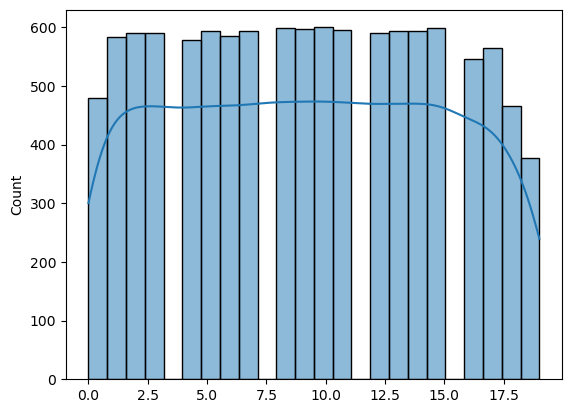

In [22]:
sns.histplot(groups.target, kde=True);

# Feature extraction and preprocessing

We begin by converting documents into a matrix where each row represents each newsgroup document and each column represents a word token, or specifically, a unigram to begin with. And the value of each element in the matrix is the number of times the word (column) occurs in the document (row). 

We are utilizing the `CountVectorizer` class from scikit-learn. To drop stop words, we simply need to specify the `stop_words` parameter. 

We can filter names with the Name corpus from NLTK. We will also remove numbers such as '00' and '000' and combinations of letters and numbers such as 'b8f'. 

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer

In [31]:
# ?CountVectorizer

In [57]:
all_names = set(names.words())

In [58]:
lemmatizer = WordNetLemmatizer()

In [51]:
# 500 most frequent tokens
count_vector = CountVectorizer(max_features=500, stop_words="english")

In [59]:
data_clean = []
for doc in groups.data:
    doc = doc.lower()
    doc_clean = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() 
                         if word.isalpha() and word not in all_names)
    data_clean.append(doc_clean)

In [60]:
data_clean_count = count_vector.fit_transform(data_clean)

In [61]:
print(count_vector.get_feature_names_out())

['able' 'accept' 'access' 'according' 'act' 'action' 'actually' 'add'
 'address' 'ago' 'agree' 'algorithm' 'allow' 'american' 'anonymous'
 'answer' 'anybody' 'apple' 'application' 'apr' 'april' 'arab' 'area'
 'argument' 'armenian' 'article' 'ask' 'asked' 'assume' 'atheist' 'attack'
 'attempt' 'available' 'away' 'bad' 'based' 'belief' 'believe' 'best'
 'better' 'bible' 'big' 'bike' 'bit' 'black' 'board' 'body' 'book' 'box'
 'build' 'bus' 'buy' 'ca' 'california' 'called' 'came' 'canada' 'car'
 'card' 'care' 'carry' 'case' 'cause' 'center' 'certain' 'certainly'
 'chance' 'change' 'check' 'child' 'chip' 'christian' 'church' 'city'
 'claim' 'clear' 'clinton' 'clipper' 'code' 'college' 'color' 'come'
 'coming' 'command' 'comment' 'common' 'communication' 'company'
 'computer' 'consider' 'considered' 'contact' 'control' 'copy' 'cost'
 'country' 'couple' 'course' 'create' 'crime' 'current' 'cut' 'data'
 'david' 'day' 'db' 'deal' 'death' 'department' 'device' 'did'
 'difference' 'different' 'di

We have just converted text from each raw newsgroup document into a sparse vector of size 500. For a vector from a document, each element represents the number of times a word token occurs in this document. Also, these 500-word tokens are selected based on their overall occurrences after text preprocessing, the removal
of stop words, and lemmatization.

# t-distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE, as its name suggests, transforms data with a high number of dimensions into a lower-dimensional space, typically two or three dimensions, while preserving the similarity between data samples (neighbor information).

The process begins by creating a probability distribution that represents the neighbors surrounding each data point. Similar data points are assigned high probabilities, while dissimilar ones receive extremely small probabilities. The measurement of similarity and neighbor distances is typically based on the Euclidean distance or other relevant metrics.

Next, t-SNE constructs a projection of the data onto a low-dimensional space with the goal of minimizing the divergence between the input distribution and the output distribution. In this process, the original high-dimensional space is modeled as a Gaussian distribution, while the resulting low-dimensional space is modeled using the t-distribution.

We pick three distinct topics, talk.religion.misc, comp.graphics, and sci.space, and visualize document vectors from these three topics.

In [93]:
# conda install openTSNE

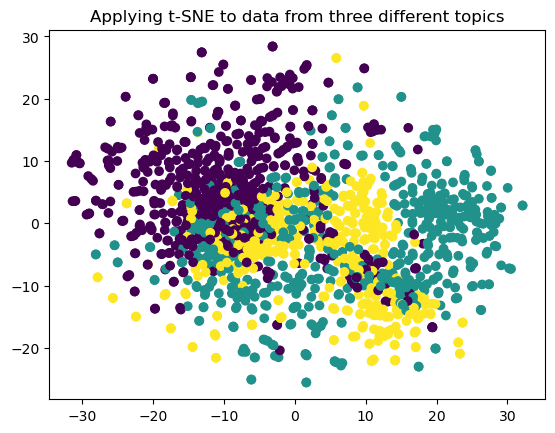

In [101]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
from openTSNE import TSNE
import matplotlib.pyplot as plt

# Fetch the data
categories_3 = ['talk.religion.misc', 'comp.graphics', 'sci.space']
groups_3 = fetch_20newsgroups(categories=categories_3)

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Collect the names for exclusion
all_names = set(names.words())

# Clean and lemmatize the documents
data_cleaned = []
for doc in groups_3.data:
    doc = doc.lower()
    doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() 
                           if word.isalpha() and word not in all_names)
    data_cleaned.append(doc_cleaned)

# Transform the cleaned data 
vectorizer = CountVectorizer(stop_words='english', max_features=500)
#vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
data_vectors = vectorizer.fit_transform(data_cleaned)

# Apply t-SNE to visualize the document vectors
tsne_model = TSNE(n_components=2, perplexity=40, random_state=42, learning_rate=500)
data_tsne = tsne_model.fit(data_vectors.toarray())

# Plot the t-SNE visualization
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=groups_3.target)
plt.title("Applying t-SNE to data from three different topics")
plt.show()